## Análisis Crediticio

In [50]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scorecardpy as sc

from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [84]:
#Importamos el archivo "data_credit_01.csv"
credit_df = pd.read_csv('data_credit_01.csv')
credit_df.head(10)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


In [85]:
credit_df.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

**Diccionario:**

- Creditability:  Admitibles.
- Account Balance:  Balance de Cuenta. 
- Duration of Credit (month):  Duración de creditos en meses. 
- Payment Status of Previous Credit:  Estado de pago del crédito anterior.
- Purpose:  Propósito del Crédito. 
- Credit Amount:  Monto del Crédito Acumulado.
- Duration in Current address:  Duración en su domicilio. 
- Age(Years):  Edad del solicitante. 
- Concurrent Credits:  Numero de Créditos Actuales del Solicitante. 
- Type of apartment:  Tipo de Apartamento del Solcilitante. 
- Occupation:  Ocupación del Solicitante 
- No of dependents:  Numero de dependientes del Solicitante. 
- Length of current employment:  Antiguedad de los empleados en años.




### Empezamos con el EDA (Analisis Exploratorio de Datos)

In [5]:
#Tabla de Frecuencias
credit_df.Creditability.value_counts()

Creditability
1    700
0    300
Name: count, dtype: int64

In [88]:
# cambiar valor de variable
credit_df["default"]=np.where(credit_df["Creditability"]==1,0,1)
credit_df.default.value_counts()

default
0    700
1    300
Name: count, dtype: int64

In [89]:
# seleccionamos algunas variables
df=credit_df[['default','Age (years)','No of dependents','Length of current employment','Account Balance']]
#Visualizamos las 10 primeras filas aleatorias(random)
df.sample(10)

,default,Age (years),No of dependents,Length of current employment,Account Balance
138,0,39,1,4,2
776,1,40,1,5,2
648,0,41,1,5,2
868,1,27,1,2,2
620,0,48,1,3,4
714,0,26,1,3,4
635,0,22,1,2,1
487,0,37,1,5,2
45,1,23,1,2,1
946,1,25,1,3,4


Cuando nos referimos a un Default, significa a un incumplimiento de los pagos acordados de un préstamo/crédito con el solicitante

In [28]:
X = df.drop('default',axis=1)
y = df['default']

Analisis Univariado

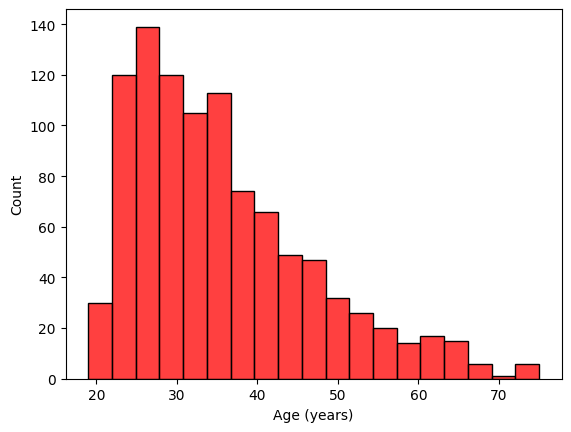

In [29]:
#Graficamos unos histogramas
sns.histplot(data=X,x='Age (years)',color='red')
plt.show()

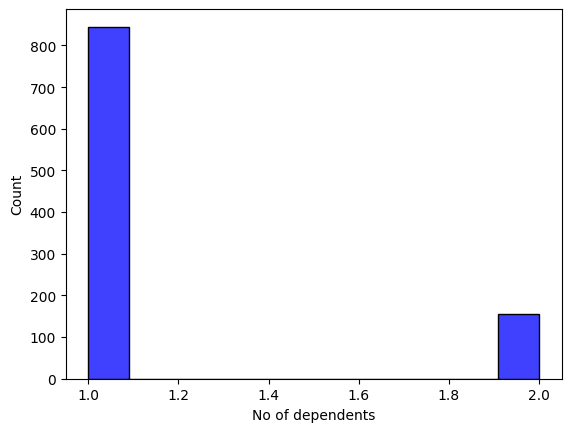

In [30]:
sns.histplot(data=X,x='No of dependents',color='blue')
plt.show()

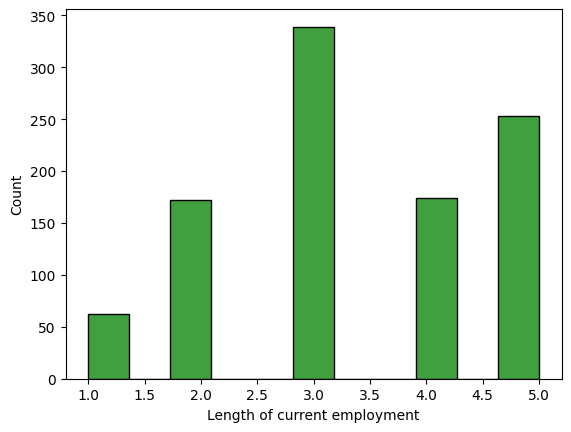

In [31]:
sns.histplot(data=X,x='Length of current employment',color='green')
plt.show()

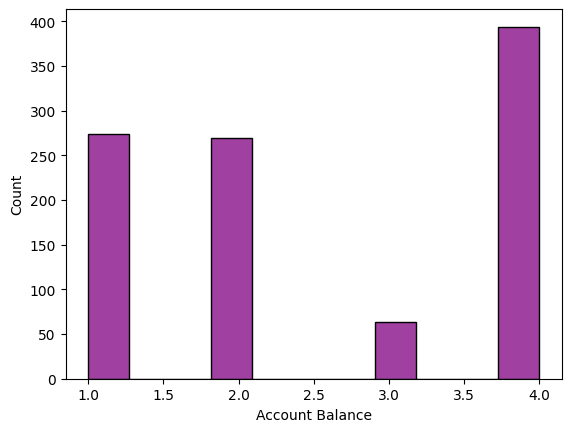

In [32]:
sns.histplot(data=X,x='Account Balance', color='purple')
plt.show()

Matriz Bivariada

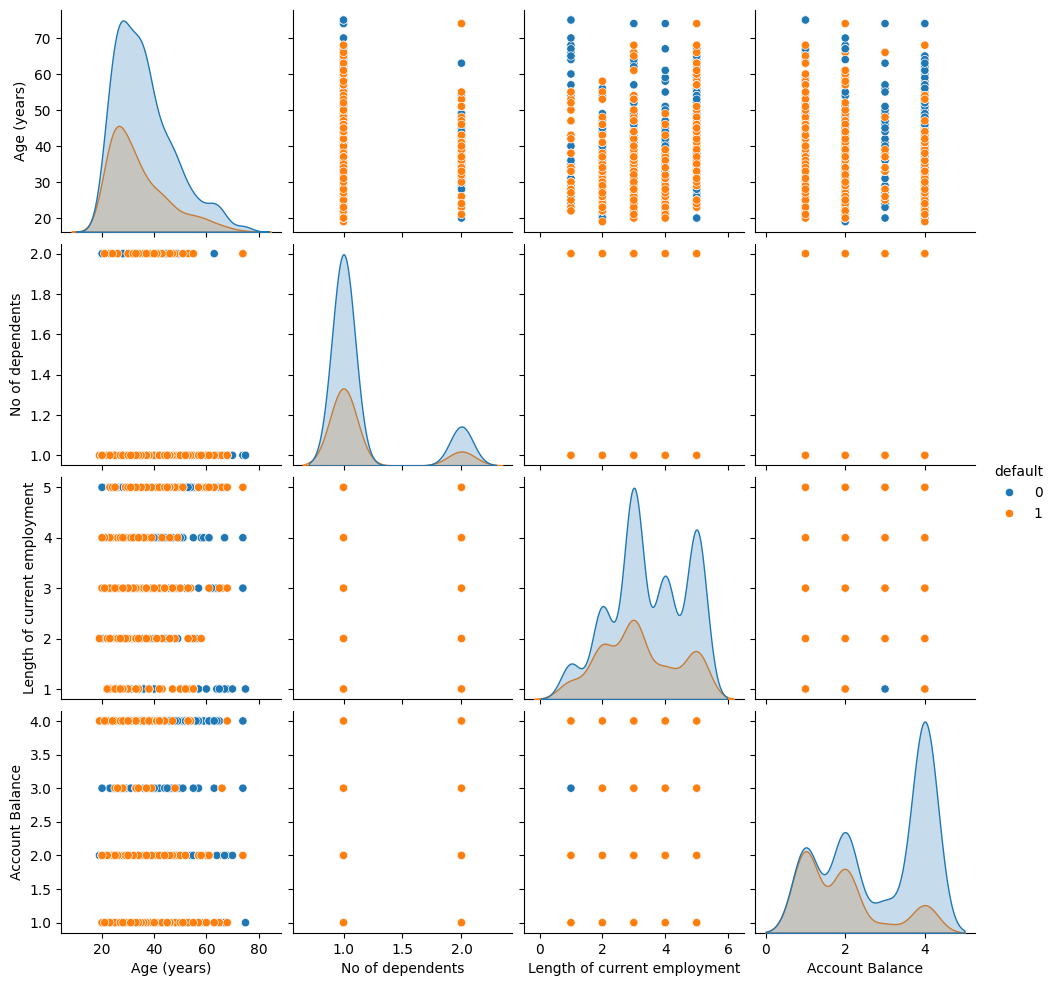

In [33]:
sns.pairplot(df,hue='default')
plt.show()

### Analisis Bivariado

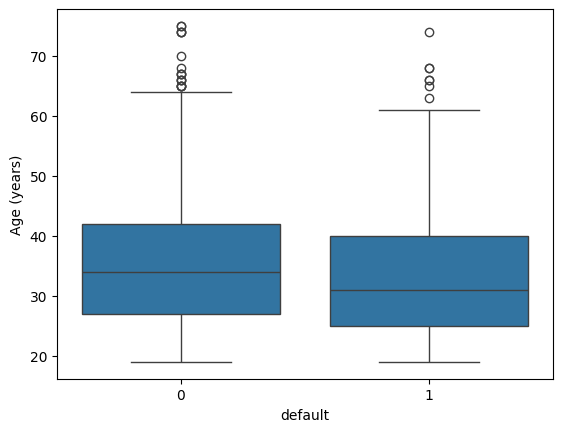

In [34]:
#Analisis de Cajas
sns.boxplot(data=df, x='default',y='Age (years)')
plt.show()

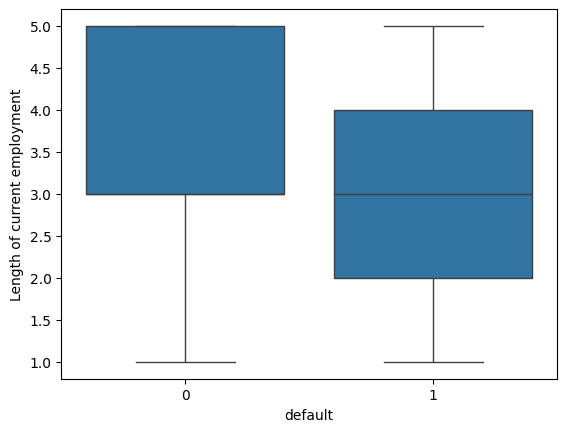

In [35]:
sns.boxplot(data=df, x='default',y='Length of current employment')
plt.show()

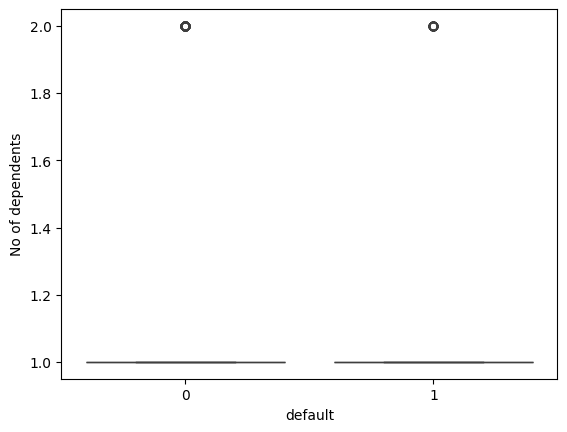

In [36]:
sns.boxplot(data=df, x='default',y='No of dependents')
plt.show()

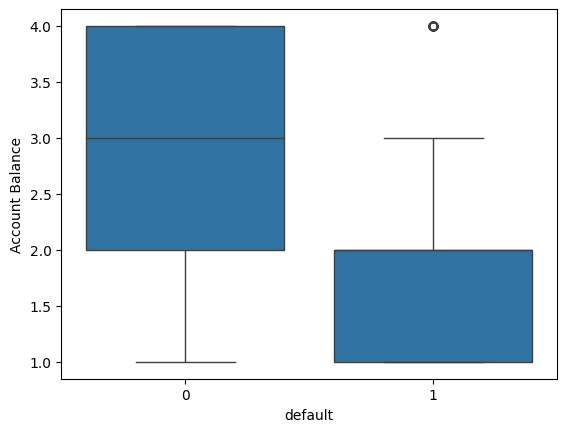

In [37]:
sns.boxplot(data=df, x='default',y='Account Balance')
plt.show()

### Matriz de Correlacion

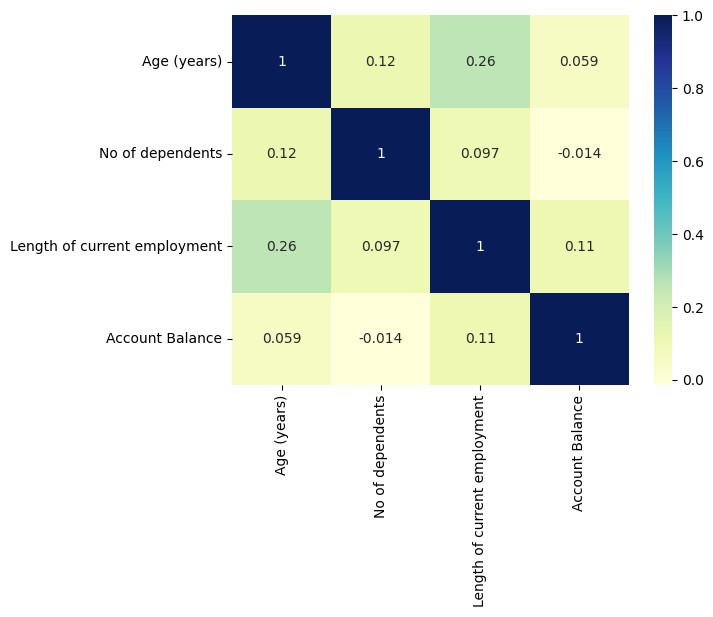

In [61]:
#Mapa de Calor, donde obtenemos la correlacion dentre las variables
sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Separacion de Data Training and Data Testing

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [44]:
#Arbol de Clasificaciob
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=20,random_state=1)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=1)

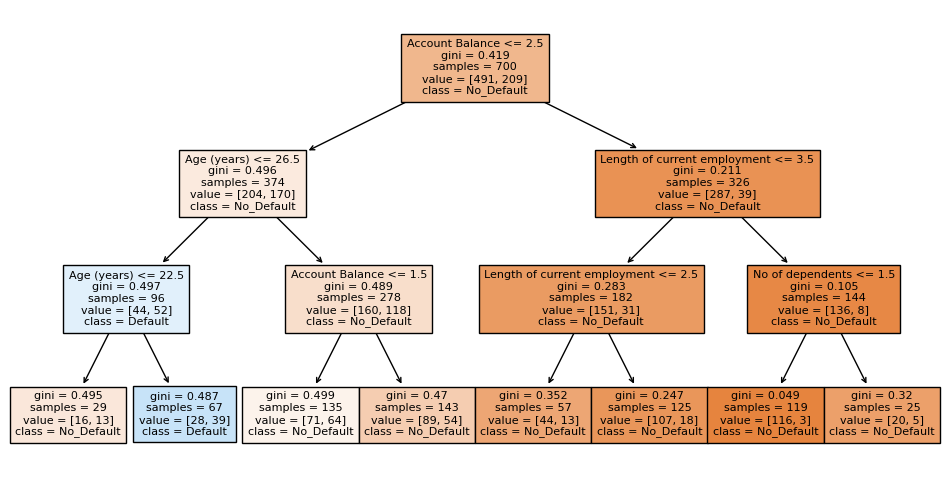

In [46]:
fig = plt.figure(figsize=(12,6))
a = plot_tree(dt, feature_names=X.columns.to_list(), fontsize=8, filled=True, class_names=['No_Default', 'Default'])

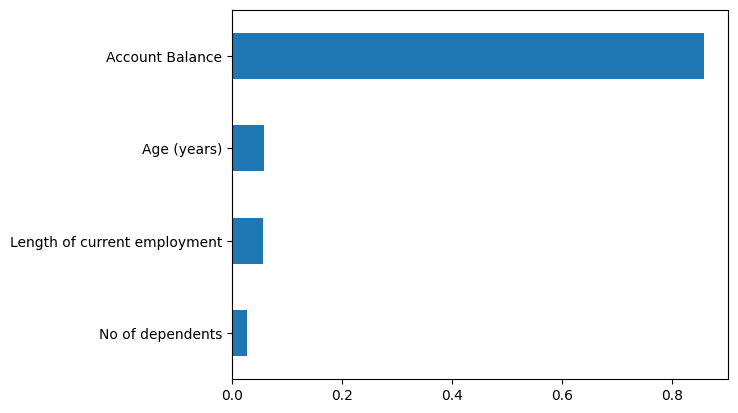

In [47]:
# mostrando los feature importances más altas
importances = pd.Series(dt.feature_importances_).sort_values(ascending=False)
feat_importances = pd.Series(dt.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).sort_values().plot(kind='barh')
plt.show()

### Módulo scorecardpy

In [52]:
df_train_total=pd.concat([X_train,y_train],axis=1)
df_train_total.head(10)

,Age (years),No of dependents,Length of current employment,Account Balance,default
731,34,2,3,4,0
716,50,1,4,1,0
640,46,1,3,1,0
804,23,1,3,1,1
737,46,1,3,4,0
329,33,1,5,4,0
927,21,1,4,1,1
134,64,1,3,4,0
787,61,1,3,2,1
764,47,2,5,4,1


In [53]:
#Usando la libreria "scorecardpy"
#Se aplica la lofia del information value y para predecir que tan importante es el default
dt_info_value = sc.iv(df_train_total, y = "default")
dt_info_value

,variable,info_value
1,Account Balance,0.745137
2,Age (years),0.248624
3,Length of current employment,0.135090
0,No of dependents,0.000153


**Conclusión:**
- Al igual que en el modelo "Decission Tree", vemos que la variable mas importante es "Account Balance"

In [70]:
#Filtramos los clientes que tiene un IV menor que 2%
#Usamos la funcion "var_filter" para filtrar las variables menos importantes para el modelo
df_filter = sc.var_filter(df_train_total, y="default",identical_limit=0.97)
df_filter.head(10)

[INFO] filtering variables ...


,Account Balance,Age (years),Length of current employment,default
731,4,34,3,0
716,1,50,4,0
640,1,46,3,0
804,1,23,3,1
737,4,46,3,0
329,4,33,5,0
927,1,21,4,1
134,4,64,3,0
787,2,61,3,1
764,4,47,5,1


In [55]:
bins = sc.woebin(df_train_total, y='default',min_perc_fine_bin=0.02,min_perc_coarse_bin=0.05,stop_limit=0.02,max_num_bin=8,method='tree')

[INFO] creating woe binning ...


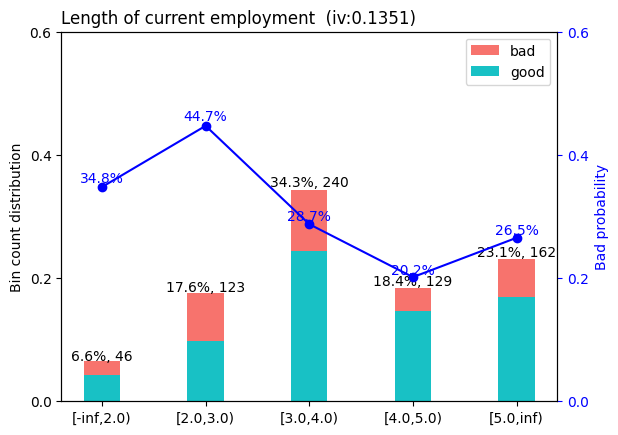

In [75]:
#Grafico Bivariado para el Intervalo de Antiguedad de los empleados
sc.woebin_plot(bins['Length of current employment'])
plt.show()

In [76]:
bins['Length of current employment']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Length of current employment,"[-inf,2.0)",46,0.065714,30,16,0.347826,0.225501,0.003485,0.13509,2.0,False
1,Length of current employment,"[2.0,3.0)",123,0.175714,68,55,0.447154,0.641935,0.080027,0.13509,3.0,False
2,Length of current employment,"[3.0,4.0)",240,0.342857,171,69,0.287500,-0.053447,0.000969,0.13509,4.0,False
3,Length of current employment,"[4.0,5.0)",129,0.184286,103,26,0.201550,-0.522523,0.044610,0.13509,5.0,False
4,Length of current employment,"[5.0,inf)",162,0.231429,119,43,0.265432,-0.163814,0.005999,0.13509,inf,False


**Descripcion**
- Es importante que los valores de los solicitantes superan un aprox del 5%, teniendo materiales, es decir, un buen numero de casos con respecto al total, de obtener valores menores al 5% podria distorcionar los valores del default.
- Los puntos en la linea azul, significa los % de default, es decir que 34.8% de un total del 100% de solicitantes terminan en default por una antiguedad laboral dede un intervalor, para este caso: 0 hasta 2 años.
- Los empleados solicitantes que tienen una antiguedad laboral entre 2 o 3 años (17.6% del total: 123), tienen una tasa de default de 44.7%.
- Segun la Antiguedad Laboral, una persona que tenga una antiguedad laboral de 3 meses es mucho mas riesgosa que una que tnga 5 años, siendo una diferencia aproximada de casi 8%.


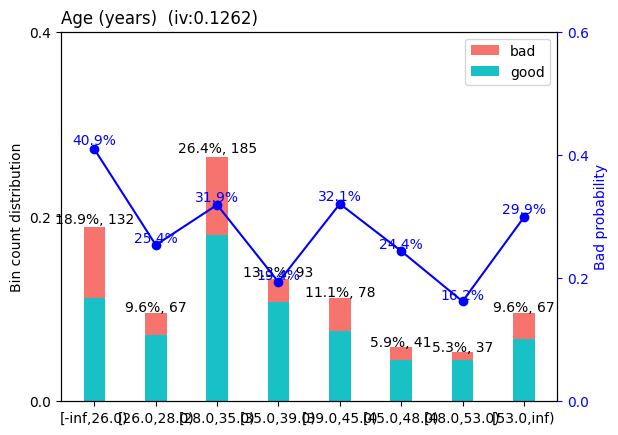

In [77]:
#Grafico Bivariado para Edad
sc.woebin_plot(bins['Age (years)'])
plt.show()

In [78]:
bins['Age (years)']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Age (years),"[-inf,26.0)",132,0.188571,78,54,0.409091,0.486385,4.840200e-02,0.126204,26.0,False
1,Age (years),"[26.0,28.0)",67,0.095714,50,17,0.253731,-0.224700,4.604836e-03,0.126204,28.0,False
2,Age (years),"[28.0,35.0)",185,0.264286,126,59,0.318919,0.095365,2.448746e-03,0.126204,35.0,False
3,Age (years),"[35.0,39.0)",93,0.132857,75,18,0.193548,-0.573006,3.817661e-02,0.126204,39.0,False
4,Age (years),"[39.0,45.0)",78,0.111429,53,25,0.320513,0.102694,1.198873e-03,0.126204,45.0,False
5,Age (years),"[45.0,48.0)",41,0.058571,31,10,0.243902,-0.277292,4.239678e-03,0.126204,48.0,False
6,Age (years),"[48.0,53.0)",37,0.052857,31,6,0.162162,-0.788118,2.713358e-02,0.126204,53.0,False
7,Age (years),"[53.0,inf)",67,0.095714,47,20,0.298507,-0.000305,8.929701e-09,0.126204,inf,False


- Mientras los solicitantes de credito sean personas de mayor edad, tendran menos tasa de deafult.

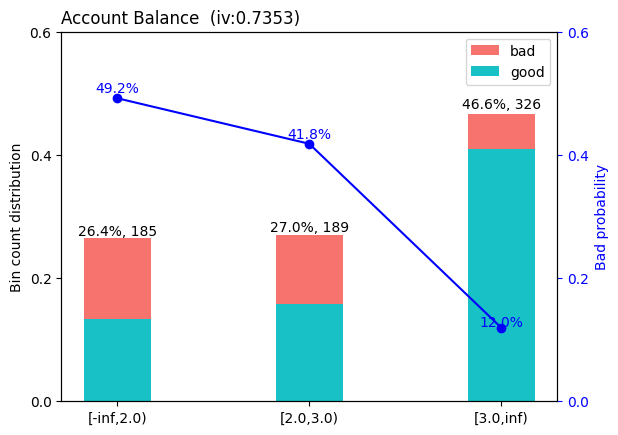

In [83]:
#Grafico Bivariado para el Intervalo de Antiguedad de los empleados
sc.woebin_plot(bins['Account Balance'])
plt.show()

In [90]:
bins['Account Balance']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Account Balance,"[-inf,2.0)",185,0.264286,94,91,0.491892,0.821675,0.200456,0.735336,2.0,False
1,Account Balance,"[2.0,3.0)",189,0.270000,110,79,0.417989,0.523077,0.080532,0.735336,3.0,False
2,Account Balance,"[3.0,inf)",326,0.465714,287,39,0.119632,-1.141811,0.454348,0.735336,inf,False
